In [ ]:
##Exploratory Data

In [1]:
# Declaring path variables to make Basemap work in jupyter hub. Make sure that the conda environment path matches yours
import os
os.environ['PATH'] = '/home/jovyan/my-conda-envs/qiime2-2019.1/bin:' + os.environ['PATH']
os.environ['PROJ_LIB'] = '/home/jovyan/my-conda-envs/qiime2-2019.1/share/proj'

In [1]:
# General Tool Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap
import biota
import biota.plot as bpl
import seaborn as sns
import collections
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import math

from biota.database import (get_samples,
                            get_sample_data,
                            get_pg_connection,
                            get_data)
from biota.util import (rarefy,
                        make_tree,
                        get_dms,
                        filter_dm_and_map,
                        get_tax_table)
from IPython.core.display import display, HTML
from pickle import dump, load

import lasio

# SQL Query imports
from sqlalchemy import create_engine, engine, inspect

from functools import partial

from ipyparallel import Client
from sourcetracker import gibbs

# Clustering imports
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from skbio.stats.ordination import pcoa

from biota.util import assign_formations


%matplotlib inline

KeyError: 'PROJ_LIB'

In [3]:
H1ProdData = pd.read_csv('1H.csv')

In [4]:
Prod_Df = H1ProdData.iloc[5:]

In [ ]:
#Prod_Df.columns = ['Property', 'PropValue', 'Stage 1', 'Stage 2', 'Stage 3']

In [ ]:
#create string of stages

In [48]:
Sampledf = pd.read_csv('1H_Clean.csv')

In [49]:
Sampledf

,Stage,"Top Perf, ft","Bottom Perf, ft",Number of perforations,"Plug Depth, ft","TVD, ft","Capacity Top Perf, bbl","Capacity Bottom Perf, bbl","Capacity Plug, bbl",Date,...,"100 Mesh, lb","Total Proppant, lb","100 Mesh, lb.1","Delivered Total Prop, lb","Plexslick 957, gal","Chemplex 4-N-1, gal","Payzone 845, gal","Payzone 850, gal","Payzone 217, gal","Stim741 Gel, gal"
0,1,23230,23392,24,23411,12540,423.5,425.9,426.2,43223,...,443960,443960,443960,511,7,99,38,99,30,1237
1,2,23029,23191,24,23210,12534,420.5,422.9,423.2,43224,...,248520,248520,248520,366,8,67,28,67,20,1264
2,3,22829,22990,24,23009,12531,417.5,419.9,420.2,43224,...,502480,502480,502480,570,7,111,42,111,20,1111
3,4,22628,22790,24,22809,12523,414.5,416.9,417.2,43225,...,504680,504680,504680,596,8,118,46,118,20,1251
4,5,22427,22589,32,22608,12509,411.5,413.9,414.2,43225,...,496340,496340,496340,503,7,102,38,102,20,1206
5,6,22227,22388,24,22407,12505,408.5,410.9,411.2,43226,...,484500,484500,484500,483,8,99,37,99,20,1261
6,7,22026,22188,24,22207,12513,405.5,407.9,408.2,43226,...,498860,498860,498860,603,7,123,46,123,20,1227
7,8,21825,21987,24,22006,12526,402.5,404.9,405.2,43227,...,494120,494120,494120,606,8,116,45,116,20,1251
8,9,21625,21786,24,21805,12536,399.5,401.9,402.2,43227,...,500040,500040,500040,514,7,104,39,104,20,1211
9,10,21424,21586,24,21605,12536,396.5,399.0,399.2,43228,...,500640,500640,500640,473,7,96,36,96,20,1190


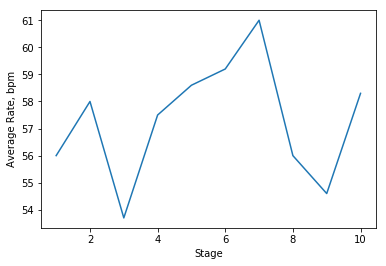

In [50]:
ax = sns.lineplot(x="Stage", y="Average Rate, bpm", data=Sampledf)

In [61]:
#Create list of plots
samplelist = ["Average Pressure, psi","Delivered Total Prop, lb","Average Rate, bpm"]

#samplelist = ["A","B","C"]

In [62]:
for i in samplelist:
    print(i)

Average Pressure, psi
Delivered Total Prop, lb
Average Rate, bpm


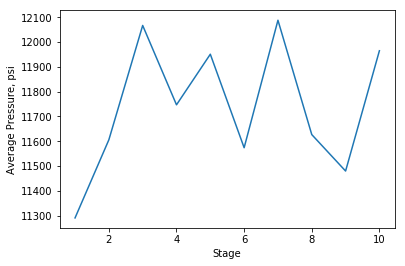

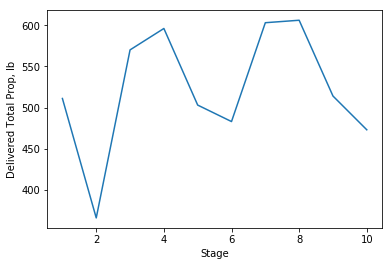

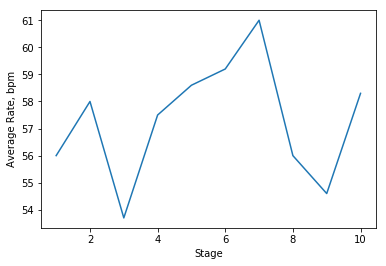

In [76]:
for i in samplelist:
    plt.figure()
    ax = sns.lineplot(x="Stage", y=i, data=Sampledf)

In [71]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [ ]:
stages = ["Stage " + str(x) for x in range(78)]

In [5]:
Prod_Df.columns = ['Property', 'PropValue', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5', 'Stage 6', 'Stage 7', 'Stage 8', 'Stage 9', 'Stage 10', 'Stage 11', 'Stage 12', 'Stage 13', 'Stage 14', 'Stage 15', 'Stage 16', 'Stage 17', 'Stage 18', 'Stage 19', 'Stage 20', 'Stage 21', 'Stage 22', 'Stage 23', 'Stage 24', 'Stage 25', 'Stage 26', 'Stage 27', 'Stage 28', 'Stage 29', 'Stage 30', 'Stage 31', 'Stage 32', 'Stage 33', 'Stage 34', 'Stage 35', 'Stage 36', 'Stage 37', 'Stage 38', 'Stage 39', 'Stage 40', 'Stage 41', 'Stage 42', 'Stage 43', 'Stage 44', 'Stage 45', 'Stage 46', 'Stage 47', 'Stage 48', 'Stage 49', 'Stage 50', 'Stage 51', 'Stage 52', 'Stage 53', 'Stage 54', 'Stage 55', 'Stage 56', 'Stage 57', 'Stage 58', 'Stage 59', 'Stage 60', 'Stage 61', 'Stage 62', 'Stage 63', 'Stage 64', 'Stage 65', 'Stage 66', 'Stage 67', 'Stage 68', 'Stage 69', 'Stage 70', 'Stage 71', 'Stage 72', 'Stage 73', 'Stage 74', 'Stage 75', 'Stage 76']

In [6]:
Prod_Df.head()

,Property,PropValue,Stage 1,Stage 2,Stage 3,Stage 4,Stage 5,Stage 6,Stage 7,Stage 8,...,Stage 67,Stage 68,Stage 69,Stage 70,Stage 71,Stage 72,Stage 73,Stage 74,Stage 75,Stage 76
5,Stage,AVERAGE,1,2,3,4,5,6,7,8,...,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,Total
6,"Top Perf, ft",Data from Set Up Tab,"23,230","23,029","22,829","22,628","22,427","22,227","22,026","21,825",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,"Bottom Perf, ft",NaN,"23,392","23,191","22,990","22,790","22,589","22,388","22,188","21,987",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,Number of perforations,NaN,24,24,24,24,32,24,24,24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,"Plug Depth, ft",NaN,"23,411","23,210","23,009","22,809","22,608","22,407","22,207","22,006",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
#ax = sns.lineplot(data=Prod_Df.iloc[6,[6,7,8]], color="coral", label="line")

In [7]:
data=Prod_Df.iloc[6,[6,7,8,9,10]].to_frame()

In [10]:
data.head()

,11
Stage 5,411.5
Stage 6,408.5
Stage 7,405.5
Stage 8,402.5
Stage 9,399.5


In [17]:
data.columns = ['Length']

In [28]:
data['Length']= data['Length'].astype(float)

In [29]:
data.head()

,Length
Stage 5,411.5
Stage 6,408.5
Stage 7,405.5
Stage 8,402.5
Stage 9,399.5


In [46]:
data.reset_index()

,index,Length
0,Stage 5,411.5
1,Stage 6,408.5
2,Stage 7,405.5
3,Stage 8,402.5
4,Stage 9,399.5


In [47]:
data.columns = ['Stage','Length']

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

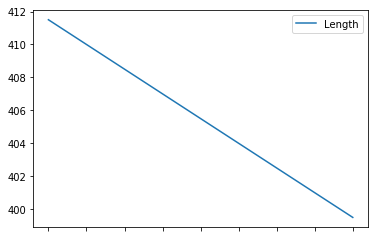

In [40]:
lines = data.plot.line()

In [ ]:
#ax = sns.scatterplot( x = "Stage", y = "Number",data = data)

In [41]:
#ax = sns.lineplot(x = "index", y = "Length",color="coral", label="line")

KeyError: 'index'

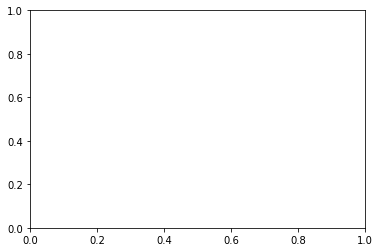

In [44]:
ax = plt.gca()
data.plot(kind='line',x='index',y='Length',ax=ax)

In [9]:
data.loc[:,11]

Stage 5    411.5
Stage 6    408.5
Stage 7    405.5
Stage 8    402.5
Stage 9    399.5
Name: 11, dtype: object

In [16]:
data.loc['Length']

KeyError: 'the label [Length] is not in the [index]'

In [ ]:
lines = data.plot.line()

In [11]:
print (data.dtypes)

11    object
dtype: object


In [13]:
data.loc['11'] = data.loc['11'].astype(float)

KeyError: 'the label [11] is not in the [index]'